In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [ ]:
dados = pd.read_csv('mg2019.csv', ';')
dados.describe()

,idade,raca,estadoCivil,nacionalidade,anoConclusao,tipoEscola,treineiro,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
count,538896.000000,538896.000000,538896.000000,538896.000000,538896.000000,538896.000000,538896.000000,393872.000000,414346.000000,414346.000000,393872.000000,414346.000000
mean,22.024361,2.071778,1.087078,1.031299,2.972176,1.296671,0.130023,492.333365,520.842738,531.215550,546.796208,596.990486
std,7.458167,1.006767,0.428067,0.210176,4.068752,0.520972,0.336329,78.027745,83.233732,61.324732,115.072018,193.028261
min,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,430.400000,462.400000,497.400000,451.800000,500.000000
50%,19.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,489.300000,526.500000,536.500000,531.400000,600.000000
75%,23.000000,3.000000,1.000000,1.000000,4.000000,2.000000,0.000000,551.000000,580.300000,572.900000,629.800000,720.000000
max,91.000000,5.000000,4.000000,4.000000,13.000000,3.000000,1.000000,842.800000,835.100000,770.500000,985.500000,1000.000000


In [ ]:
sort = (dados.groupby('municipioResidencia').size())
sort.sort_values(ascending=False)

municipioResidencia
Belo Horizonte      79384
Uberlândia          21368
Contagem            18156
Montes Claros       17165
Juiz de Fora        15870
                    ...  
Albertina              29
Consolação             28
Doresópolis            28
Serra da Saudade       17
Água Comprida          13
Length: 853, dtype: int64

In [ ]:
sort = (dados.groupby('idade').size())
sort.sort_values(ascending=False)

idade
18    95708
17    83179
19    64375
20    45026
16    33367
      ...  
91        1
83        1
78        1
82        1
4         1
Length: 76, dtype: int64

In [ ]:
provas = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_MT','NU_NOTA_LC','NU_NOTA_REDACAO']
dados['NU_NOTA_TOTAL'] = dados[provas].sum(axis=1)/5
dados = dados.query('NU_NOTA_TOTAL > 0')
dados = dados.query('treineiro != 1')
dados = dados.query('treineiro != 1')
dados = dados.query('tipoEscola > 1')
dados = dados.dropna()
dados = dados.drop(axis=1, columns='treineiro')
dados

,municipioResidencia,idade,sexo,raca,estadoCivil,nacionalidade,municipioNascimento,anoConclusao,tipoEscola,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,NU_NOTA_TOTAL
14,Araguari,17,M,3,1,1,Barbalha,0,2,460.3,550.4,484.1,533.0,660.0,H,E,B,A,B,537.56
23,Ninheira,18,F,1,1,1,Pedra Azul,0,2,423.3,358.0,472.4,439.0,600.0,C,B,B,A,A,458.54
24,Cachoeira de Pajeú,18,F,3,1,1,Pedra Azul,0,2,426.2,508.4,514.1,445.4,620.0,C,E,D,A,B,502.82
26,Belo Horizonte,17,F,1,1,1,Belo Horizonte,0,2,536.1,545.5,561.9,629.5,800.0,F,F,J,C,B,614.60
33,Mantena,17,M,2,1,1,Mantena,0,2,580.8,376.8,545.3,520.5,640.0,E,E,C,B,B,532.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538885,Uberlândia,18,F,3,1,1,Uberlândia,0,2,491.6,549.3,586.8,633.5,640.0,E,G,K,B,B,580.24
538886,São João do Paraíso,17,F,3,1,1,São João do Paraíso,0,2,425.7,525.0,511.5,621.8,620.0,E,G,K,B,B,540.80
538889,Iturama,17,F,2,1,1,Iturama,0,2,456.6,419.2,447.2,446.5,560.0,A,H,B,A,A,465.90
538890,Ibirité,18,F,3,1,1,Ibirité,0,2,363.4,527.8,547.0,516.9,740.0,G,E,G,B,B,539.02


In [ ]:
sort = (dados.groupby('municipioResidencia').size())
sort.sort_values(ascending=False)

municipioResidencia
Belo Horizonte            14746
Uberlândia                 4191
Contagem                   3710
Juiz de Fora               3432
Montes Claros              2970
                          ...  
Alagoa                        7
Antônio Prado de Minas        7
Queluzito                     4
Água Comprida                 4
Serra da Saudade              2
Length: 853, dtype: int64

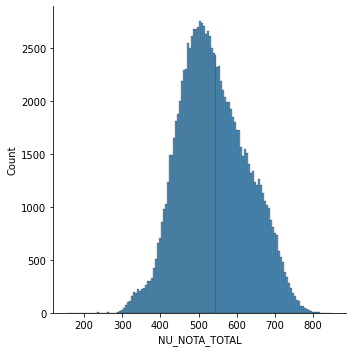

In [ ]:
sns.displot(dados, x="NU_NOTA_TOTAL")

Text(0, 0.5, 'Nota Total')

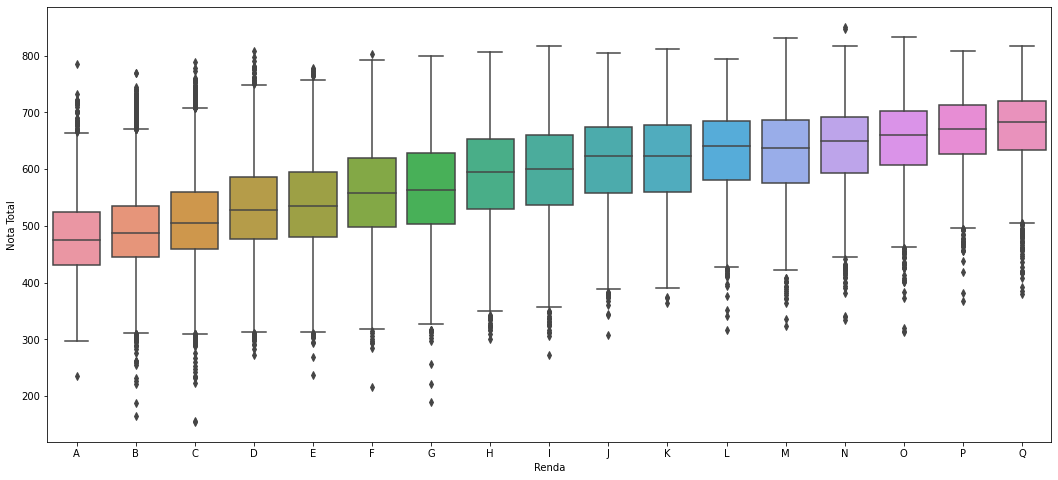

In [ ]:
#ordenando os registros pelo Q006 (criterio de renda) e mostrando como boxplot
rendaOrdenada = dados['Q006'].unique()
rendaOrdenada.sort()
plt.figure(figsize=(18,8))
sns.boxplot(x='Q006', y='NU_NOTA_TOTAL', data= dados, order= rendaOrdenada)
plt.xlabel('Renda')
plt.ylabel('Nota Total')

Text(0, 0.5, 'Quantidade')

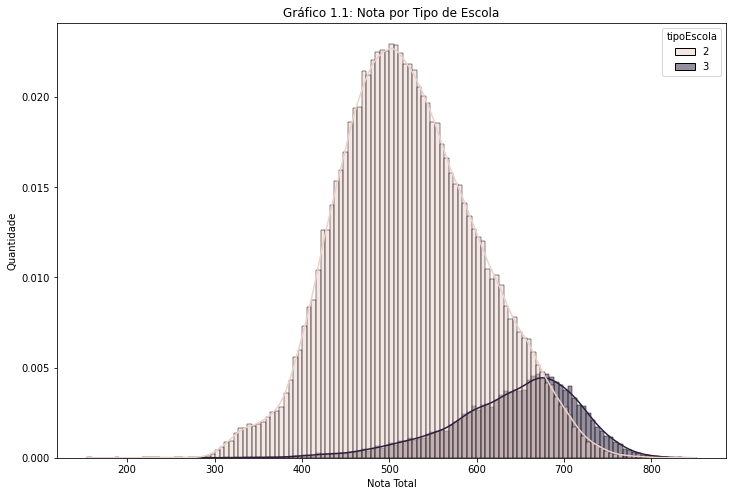

In [ ]:
#dados de escolaridade
plt.figure(figsize=(12,8))
sns.histplot(dados, x = "NU_NOTA_TOTAL", hue="tipoEscola", kde=True, stat="probability")
plt.title('Gráfico 1.1: Nota por Tipo de Escola')
plt.xlabel('Nota Total')
plt.ylabel('Quantidade')

# Escola Pública

In [ ]:
escolaPublica = dados.query('tipoEscola == 2')
escolaPublica

,municipioResidencia,idade,sexo,raca,estadoCivil,nacionalidade,municipioNascimento,anoConclusao,tipoEscola,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,NU_NOTA_TOTAL
14,Araguari,17,M,3,1,1,Barbalha,0,2,460.3,550.4,484.1,533.0,660.0,H,E,B,A,B,537.56
23,Ninheira,18,F,1,1,1,Pedra Azul,0,2,423.3,358.0,472.4,439.0,600.0,C,B,B,A,A,458.54
24,Cachoeira de Pajeú,18,F,3,1,1,Pedra Azul,0,2,426.2,508.4,514.1,445.4,620.0,C,E,D,A,B,502.82
26,Belo Horizonte,17,F,1,1,1,Belo Horizonte,0,2,536.1,545.5,561.9,629.5,800.0,F,F,J,C,B,614.60
33,Mantena,17,M,2,1,1,Mantena,0,2,580.8,376.8,545.3,520.5,640.0,E,E,C,B,B,532.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538885,Uberlândia,18,F,3,1,1,Uberlândia,0,2,491.6,549.3,586.8,633.5,640.0,E,G,K,B,B,580.24
538886,São João do Paraíso,17,F,3,1,1,São João do Paraíso,0,2,425.7,525.0,511.5,621.8,620.0,E,G,K,B,B,540.80
538889,Iturama,17,F,2,1,1,Iturama,0,2,456.6,419.2,447.2,446.5,560.0,A,H,B,A,A,465.90
538890,Ibirité,18,F,3,1,1,Ibirité,0,2,363.4,527.8,547.0,516.9,740.0,G,E,G,B,B,539.02


Text(0.5, 1.0, 'Distruibuição em Escola Publica')

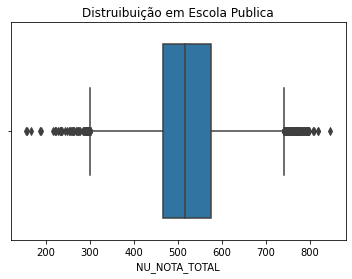

In [ ]:
sns.boxplot(x = 'NU_NOTA_TOTAL', data=escolaPublica)
plt.title('Distruibuição em Escola Publica')

Text(0.5, 1.0, 'Distruibuição em Escola Publica')

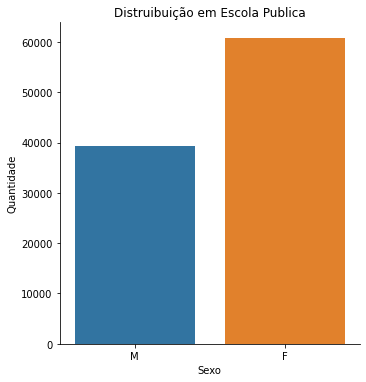

In [ ]:
sns.catplot(x= 'sexo', kind="count", order=['M','F'], data = escolaPublica)
plt.xlabel('Sexo')
plt.ylabel('Quantidade')
plt.title('Distruibuição em Escola Publica')

Text(0.5, 1.0, 'Gráfico 1.1: Nota em Escola Publica por Sexo')

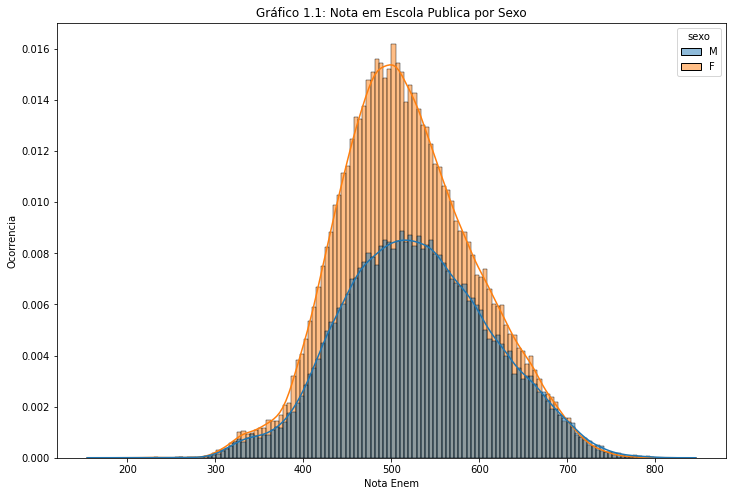

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(escolaPublica, x = "NU_NOTA_TOTAL", hue="sexo", kde=True, stat="probability")
plt.xlabel('Nota Enem')
plt.ylabel('Ocorrencia')
plt.title('Gráfico 1.1: Nota em Escola Publica por Sexo')

Text(0.5, 1.0, 'Distruibuição em Escola Publica')

<Figure size 864x576 with 0 Axes>

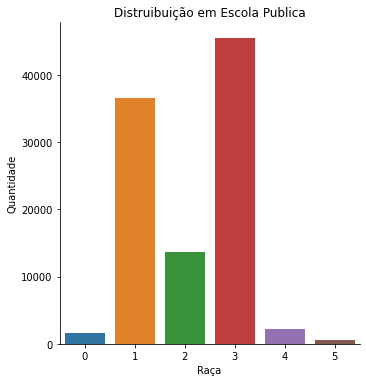

In [ ]:
plt.figure(figsize=(12,8))
sns.catplot(x= 'raca', kind="count", data = escolaPublica)
plt.xlabel('Raça')
plt.ylabel('Quantidade')
plt.title('Distruibuição em Escola Publica')

Text(0, 0.5, 'Nota Total')

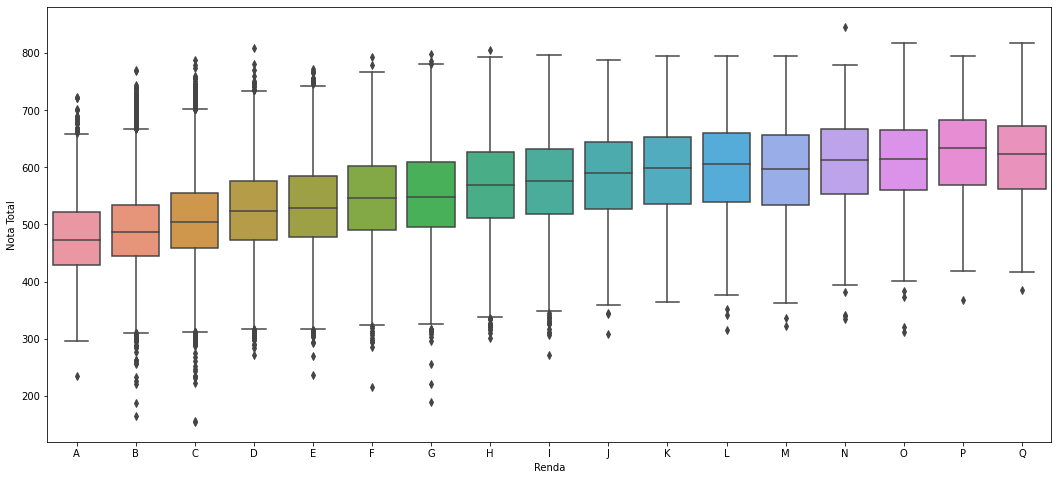

In [ ]:
#ordenando os registros pelo Q006 (criterio de renda) e mostrando como boxplot
rendaOrdenada = escolaPublica['Q006'].unique()
rendaOrdenada.sort()
plt.figure(figsize=(18,8))
sns.boxplot(x='Q006', y='NU_NOTA_TOTAL', data= escolaPublica, order= rendaOrdenada)
plt.xlabel('Renda')
plt.ylabel('Nota Total')

# Escola Privada

In [ ]:
escolaPrivada = dados.query('tipoEscola == 3')
escolaPrivada.size

320380

Text(0.5, 1.0, 'Distruibuição em Escola Privada')

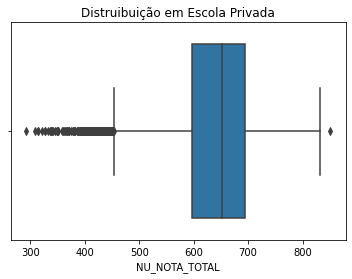

In [ ]:
sns.boxplot(x = 'NU_NOTA_TOTAL', data=escolaPrivada)
plt.title('Distruibuição em Escola Privada')

Text(0.5, 1.0, 'Distruibuição em Escola Privada')

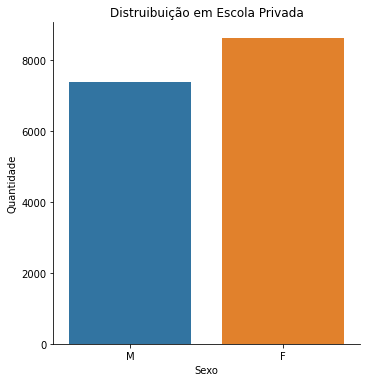

In [ ]:
sns.catplot(x= 'sexo', kind="count",order=['M','F'], data=escolaPrivada)
plt.xlabel('Sexo')
plt.ylabel('Quantidade')
plt.title('Distruibuição em Escola Privada')

Text(0.5, 1.0, 'Nota em Escola Privada por Sexo')

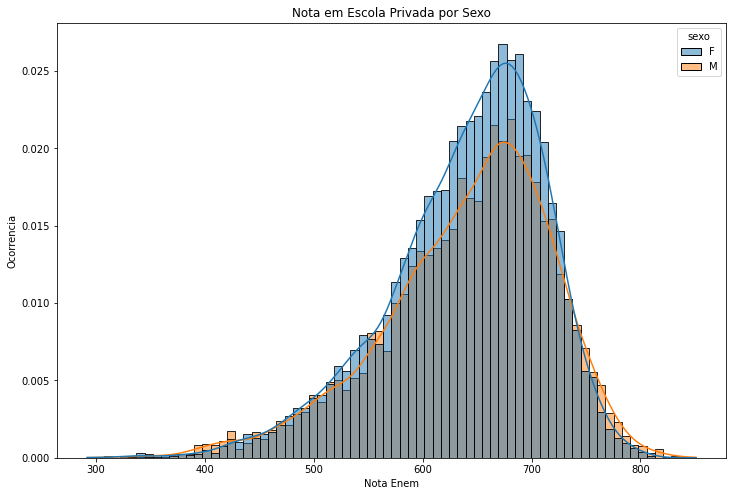

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(escolaPrivada, x = "NU_NOTA_TOTAL", hue="sexo", kde=True, stat="probability")
plt.xlabel('Nota Enem')
plt.ylabel('Ocorrencia')
plt.title('Nota em Escola Privada por Sexo')

Text(0.5, 1.0, 'Distruibuição de Sexo em Escola Privada')

<Figure size 864x576 with 0 Axes>

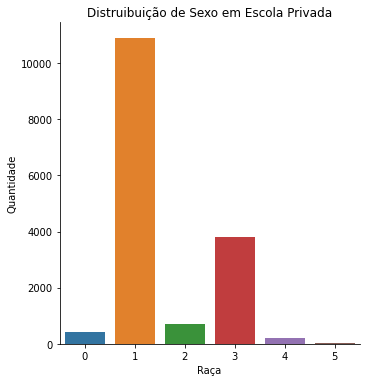

In [ ]:
plt.figure(figsize=(12,8))
sns.catplot(x= 'raca', kind="count", data = escolaPrivada)
plt.xlabel('Raça')
plt.ylabel('Quantidade')
plt.title('Distruibuição de Sexo em Escola Privada')

# Nota e renda


In [ ]:
ado = ['Q006', 'NU_NOTA_TOTAL', 'tipoEscola']
renda = dados[ado]
renda = renda.groupby('Q006').mean()
renda

,NU_NOTA_TOTAL,tipoEscola
Q006,,
A,478.813299,2.029389
B,491.614160,2.014282
C,510.219886,2.029285
D,532.000245,2.070476
E,537.619273,2.077778
F,558.205745,2.156856
G,564.161774,2.160542
H,588.683909,2.298625
I,594.962482,2.306975


In [ ]:
renda = dados[ado]
renda

,Q006,NU_NOTA_TOTAL,tipoEscola
14,B,537.56,2
23,B,458.54,2
24,D,502.82,2
26,J,614.60,2
33,C,532.68,2
...,...,...,...
538885,K,580.24,2
538886,K,540.80,2
538889,B,465.90,2
538890,G,539.02,2


In [ ]:
renda2 = renda

In [ ]:
renda = renda.replace({ 
        'Q006': {
            'A': 'E',
            'B': 'E',
            'C': 'E',
            'D': 'E',
            'E': 'D',
            'F': 'D',
            'G': 'D',
            'H': 'C',
            'I': 'C',
            'J': 'C',
            'K': 'C',
            'L': 'C',
            'M': 'C',
            'N': 'B',
            'O': 'B',
            'P': 'B',
            'Q': 'A'
            }})

In [ ]:
renda.groupby('Q006').mean()

,NU_NOTA_TOTAL,tipoEscola
Q006,,
A,670.875032,2.879022
B,648.343105,2.708935
C,602.511730,2.368707
D,550.507648,2.121138
E,506.901373,2.031962


Text(0.5, 1.0, 'Grafico 1.2: Boxplot de Nota em Relação a Renda')

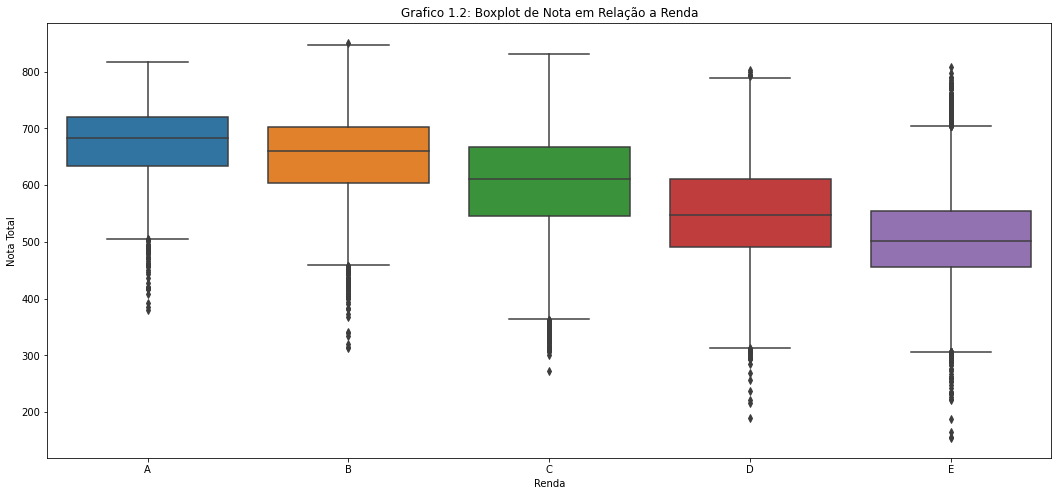

In [ ]:
rendaOrdenada = renda['Q006'].unique()
rendaOrdenada.sort()
plt.figure(figsize=(18,8))
sns.boxplot(x='Q006', y='NU_NOTA_TOTAL', data= renda, order= rendaOrdenada)
plt.xlabel('Renda')
plt.ylabel('Nota Total')
plt.title('Grafico 1.2: Boxplot de Nota em Relação a Renda')

In [ ]:
renda2 = renda2.replace({ 
        'Q006': {
            'A': '1',
            'B': '2',
            'C': '3',
            'D': '4',
            'E': '5',
            'F': '6',
            'G': '7',
            'H': '8',
            'I': '9',
            'J': '10',
            'K': '11',
            'L': '12',
            'M': '13',
            'N': '14',
            'O': '15',
            'P': '16',
            'Q': '17'
            }})

In [ ]:
renda2['Q006'] = pd.to_numeric(renda2['Q006'])

In [ ]:
renda2.corr()

,Q006,NU_NOTA_TOTAL,tipoEscola
Q006,1.000000,0.500038,0.531632
NU_NOTA_TOTAL,0.500038,1.000000,0.456707
tipoEscola,0.531632,0.456707,1.000000


In [ ]:
escolaPrivada.groupby('Q006').size()

Q006
A      75
B     307
C     858
D     851
E    1036
F     954
G    1468
H    1586
I    1316
J     948
K     728
L     667
M     717
N    1134
O    1053
P     955
Q    1366
dtype: int64

# Contas, contas e contas



In [ ]:
idade = escolaPrivada.groupby('idade').size()
idade.sort_values(axis=0, ascending=False)

idade
17    8020
18    7002
19     784
16      98
20      73
15      18
21      11
22       2
8        2
30       2
50       1
23       1
27       1
29       1
36       1
38       1
55       1
dtype: int64

In [ ]:
escolaPrivada.describe()

,idade,raca,estadoCivil,nacionalidade,anoConclusao,tipoEscola,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_TOTAL
count,16019.000000,16019.000000,16019.000000,16019.0,16019.0,16019.0,16019.000000,16019.000000,16019.000000,16019.000000,16019.000000,16019.000000
mean,17.552843,1.534802,0.985767,1.0,0.0,3.0,566.862132,594.954854,581.750415,667.401941,793.889756,640.971820
std,0.806161,0.929375,0.221059,0.0,0.0,0.0,69.991145,69.887200,49.081036,111.993437,143.140561,74.402944
min,8.000000,0.000000,0.000000,1.0,0.0,3.0,0.000000,0.000000,329.100000,0.000000,0.000000,292.200000
25%,17.000000,1.000000,1.000000,1.0,0.0,3.0,532.800000,560.500000,556.900000,600.750000,700.000000,597.750000
50%,17.000000,1.000000,1.000000,1.0,0.0,3.0,576.800000,604.000000,588.200000,679.600000,820.000000,652.740000
75%,18.000000,3.000000,1.000000,1.0,0.0,3.0,611.600000,641.800000,613.600000,744.600000,900.000000,693.950000
max,55.000000,5.000000,4.000000,1.0,0.0,3.0,821.100000,790.600000,749.300000,985.500000,1000.000000,850.820000


In [ ]:
escolaPublica.describe()

,idade,raca,estadoCivil,nacionalidade,anoConclusao,tipoEscola,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_TOTAL
count,100104.000000,100104.000000,100104.000000,100104.0,100104.0,100104.0,100104.000000,100104.000000,100104.000000,100104.000000,100104.000000,100104.000000
mean,18.081365,2.116609,1.007762,1.0,0.0,2.0,475.151776,505.659263,520.030111,526.882096,582.945137,522.133677
std,3.025659,1.003246,0.250888,0.0,0.0,0.0,71.445150,76.455445,58.642700,102.905847,184.439591,80.661169
min,6.000000,0.000000,0.000000,1.0,0.0,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,154.220000
25%,17.000000,1.000000,1.000000,1.0,0.0,2.0,418.900000,450.200000,487.800000,444.200000,500.000000,465.800000
50%,18.000000,2.000000,1.000000,1.0,0.0,2.0,469.700000,510.300000,525.800000,510.000000,580.000000,516.860000
75%,18.000000,3.000000,1.000000,1.0,0.0,2.0,528.900000,561.900000,560.100000,599.225000,680.000000,575.940000
max,83.000000,5.000000,4.000000,1.0,0.0,2.0,842.800000,790.500000,749.600000,985.000000,1000.000000,846.260000


In [ ]:
idade = escolaPublica.groupby('idade').size()
idade.sort_values(axis=0, ascending=False)

idade
18    45012
17    42147
19     7580
20     1881
21      575
22      320
16      320
23      258
24      190
25      158
26      129
27      105
28       94
30       76
32       65
29       65
35       60
40       58
43       57
33       55
34       54
31       53
39       53
37       50
41       50
36       49
38       49
44       48
45       46
47       39
42       37
46       36
49       34
48       33
50       30
53       30
55       26
51       24
15       23
52       22
54       22
57       15
56       14
58       12
59        9
61        8
60        5
63        5
67        5
62        4
64        4
65        2
66        2
11        1
8         1
83        1
12        1
73        1
6         1
dtype: int64

In [ ]:
sexo = escolaPublica.groupby('sexo').size()
sexo.sort_values(axis=0, ascending=False)

sexo
F    60833
M    39271
dtype: int64

In [ ]:
idade = escolaPrivada.groupby('sexo').size()
idade.sort_values(axis=0, ascending=False)

sexo
F    8636
M    7383
dtype: int64

In [ ]:
escolaPublica.groupby('raca').size()

raca
0     1638
1    36569
2    13615
3    45548
4     2232
5      502
dtype: int64

In [ ]:
escolaPrivada.groupby('raca').size()

raca
0      403
1    10908
2      688
3     3796
4      206
5       18
dtype: int64

In [ ]:
escolaPublica.groupby('Q006').size()

Q006
A     2477
B    21189
C    28440
D    11224
E    12284
F     5128
G     7676
H     3725
I     2971
J     1252
K     1008
L      615
M      637
N      656
O      401
P      233
Q      188
dtype: int64